In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("C:/Users/User/Documents/Data Analytics/vgsales/vgsales.csv")

# Step 1: Understanding The Data

- Head and Tail
- shape
- dtypes
- coulmns
- describe

In [4]:
# Head 

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Features:
`Rank` - Ranking of overall sales

`Name` - The games name

`Platform` - Platform of the games release ( PC,PS4)

`Year` - Year of the game's release

`Genre` - Genre of the game

`Publisher` - Publisher of the game

`NA_Sales` - Sales in North America (in millions)

`EU_Sales` - Sales in Europe (in millions)

`JP_Sales` - Sales in Japan (in millions)

`Other_Sales` - Sales in the rest of the world (in millions)

`Global_Sales` - Total worldwide sales.

In [6]:
# Shape of the dataframe

df.shape

(16598, 11)

In [7]:
#data type 

df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# Names of Columns 

df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
# describe

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Step 2: Data Preparation

- Checking for empty cells
- Dropping columns that are not needed
- Uniqueness of every column
- Duplicate
- Groupby
- Sorting values

In [11]:
df.isnull().sum()

# Although there are null cases, will keep them because of their ranking system.
# Later through the data we will remove the ranking aspect and tackle the rest of the data.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
#Columns that has null in it 

df.columns[df.isnull().any()]

Index(['Year', 'Publisher'], dtype='object')

In [13]:
# Dropping of not needed columns for now.

df_cleaned = df.drop(['Publisher'],axis = 1)

In [14]:
# Number of unique names 

df_cleaned['Name'].nunique()

11493

In [15]:
#Number of unique Platforms

df_cleaned['Platform'].nunique()

31

In [16]:
#Check for duplicate using subset

df.loc[df_cleaned.duplicated(subset = ['Name','Year'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [17]:
# Group by Name, Year and Genre.
# Then sum the respective sales
# The Group is due to the fact that they were introduced on multiple platforms.

df_grouped = df.groupby(['Name','Genre','Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

#Sorting by Global_Sales
df_grouped_sorted = df_grouped.sort_values(by='Global_Sales', ascending=False)
df_grouped_sorted

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11635,Wii Sports,Sports,2006.0,41.49,29.02,3.77,8.46,82.74
9849,Super Mario Bros.,Platform,1985.0,29.08,3.58,6.81,0.77,40.24
3935,Grand Theft Auto V,Action,2013.0,16.64,14.58,1.03,5.52,37.78
5856,Mario Kart Wii,Racing,2008.0,15.85,12.88,3.79,3.31,35.82
11637,Wii Sports Resort,Sports,2009.0,15.75,11.01,3.28,2.96,33.00
...,...,...,...,...,...,...,...,...
5029,Kana: Imouto,Adventure,2010.0,0.00,0.00,0.01,0.00,0.01
6932,Naraku no Shiro,Adventure,2008.0,0.00,0.00,0.01,0.00,0.01
11331,Vanark,Shooter,1999.0,0.01,0.01,0.00,0.00,0.01
2529,Doraemon Wii: Himitsu Douguou Ketteisen!,Misc,2007.0,0.00,0.00,0.01,0.00,0.01


# Important Questions to ask

1. Which game has the `highest global sales` across all years?
2. What is the `total sales in North America (NA_Sales)` for all games released in the year 2010?
3. How do the ``sales of games in Japan (JP_Sales)`` compare to those in `Europe (EU_Sales)` across different genres?
4. What are the `top 5 games` released on the `'PlayStation 4' platform`, ranked by their `global sales`?
5. Which `publisher has the highest total sales (Global_Sales)` across all games?
6. In which `year` did the `most number of games` with `global sales above 10 million units` release?
7. What is the `average sales of games in Europe (EU_Sales)` across all years?
8. Which `game genre` has the `highest total sales` in `North America (NA_Sales)`?
9. How does the `distribution of sales` across `different regions (NA_Sales, EU_Sales, JP_Sales, Other_Sales)` differ for the top 10 games by global sales?
10. What is the `average rank of games released by each publisher`, and which `publisher` has the `highest average rank`?



In [19]:
# 1.Game with the highest Global_sales

top_game = df_grouped_sorted.loc[df_grouped_sorted['Global_Sales'].idxmax()]
print(f"{top_game['Name']} has the highest Global Sales with {top_game['Global_Sales']} million dollars")

Wii Sports has the highest Global Sales with 82.74 million dollars


In [20]:
#2. Total sales in North America (NA_Sales) for all games released in the year 2010

#Filtering the data with Year = 2010
total_sales_2010 = df[df['Year'] == 2010]

#Filter only NA_Sales
na_sales_2010 = total_sales_2010['NA_Sales']

#Total Sales for NA in 2010
total_na_sales_2010 = na_sales_2010.sum()
rounded_total = round(total_na_sales_2010, 2)

print(f"The total Sales of NA_Sales for all games in 2010 is {rounded_total} million dollars")

The total Sales of NA_Sales for all games in 2010 is 304.24 million dollars


In [21]:
# 3. How do the sales of games in Japan (JP_Sales) compare to those in Europe (EU_Sales) across different genres?

#Knowing the correlation between the 2 sales
correlation = df['JP_Sales'].corr(df['EU_Sales'])
print(f"Correlation: {correlation}")

Correlation: 0.43558445280918145


In [22]:
df_genre = df.groupby('Genre')[['EU_Sales', 'JP_Sales']].sum().reset_index()
df_genre

,Genre,EU_Sales,JP_Sales
0,Action,525.00,159.95
1,Adventure,64.13,52.07
2,Fighting,101.32,87.35
3,Misc,215.98,107.76
4,Platform,201.63,130.77
5,Puzzle,50.78,57.31
6,Racing,238.39,56.69
7,Role-Playing,188.06,352.31
8,Shooter,313.27,38.28
9,Simulation,113.38,63.70


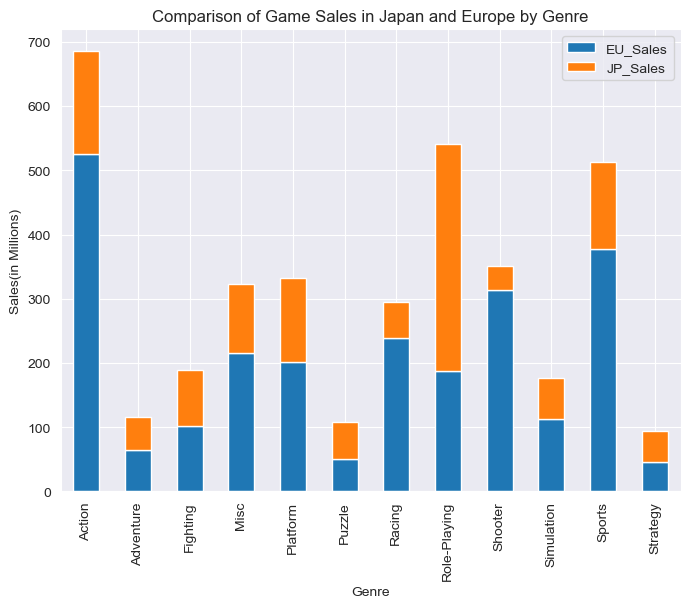

In [23]:
#Setting Genre column as the Primary Column for arrangement
genre = df_genre.set_index('Genre')

#Create a bar graph
genre.plot(kind='bar',figsize=(8,6), stacked=True)

plt.title("Comparison of Game Sales in Japan and Europe by Genre")
plt.xlabel('Genre')
plt.ylabel('Sales(in Millions)')

plt.show()

In [24]:
# 4.What are the top 5 games released on the 'PlayStation 4' platform, ranked by their global sales?

#check if ps4 is par of the platform
df_platform = df[df['Platform'] == 'PS4']

#duplicated subset
top_df_platform =df_platform.sort_values(by='Global_Sales', ascending=False).head(5).reset_index()

top_top = top_df_platform[['Name', 'Global_Sales']]
print(f"The top 5 games on PS4 are \n{top_top['Name']}")

The top 5 games on PS4 are 
0         Call of Duty: Black Ops 3
1                Grand Theft Auto V
2                           FIFA 16
3      Star Wars Battlefront (2015)
4    Call of Duty: Advanced Warfare
Name: Name, dtype: object


Text(0.5, 1.0, 'Top 5 Games released of PlayStation 4')

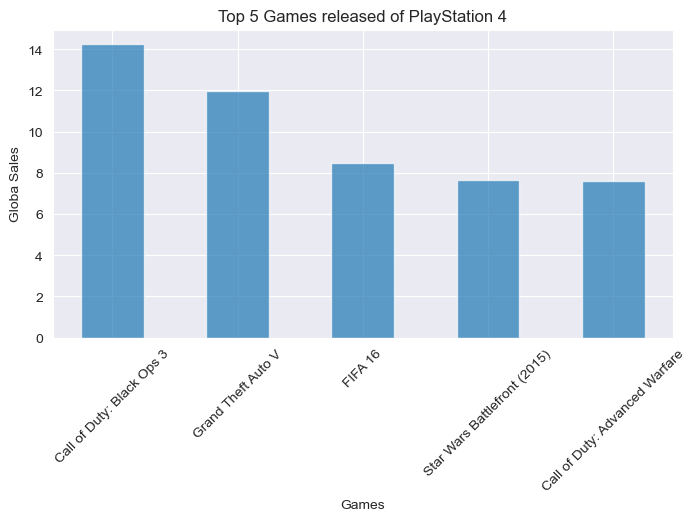

In [25]:
plt.figure(figsize=(8,4))

x=top_df_platform['Name']
#Creating a bar chart
plt.bar (x ,top_df_platform['Global_Sales'], alpha = 0.7, width=.5)

#Rotating the names 45 degree
plt.xticks(rotation=45)
plt.xlabel('Games')
plt.ylabel('Globa Sales')
plt.title('Top 5 Games released of PlayStation 4')

In [26]:
# 5. Which publisher has the highest total sales (Global_Sales) across all games?

#Group the dataset according to the Publisher 
df_publisher = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# locate the highest total sales by a publisher 
df_publisher = df_publisher.loc[df_publisher['Global_Sales'].idxmax()]

#Print the result
print(f"The Publisher with the highest total sales is {df_publisher['Publisher']}")

The Publisher with the highest total sales is Nintendo


In [27]:
# 6. In which year did the most number of games with global sales above 10 million units release?

#Filter the year when games is sold more than 10 million 
filtered_df_year = df[df['Global_Sales'] > 10]

#Count the Number of games released per year 
yearly_counts = filtered_df_year['Year'].value_counts()

#Print year with the most count 
print(yearly_counts.head(1))

Year
2009.0    6
Name: count, dtype: int64


In [28]:
# 7.What is the average sales of games in Europe (EU_Sales) across all years?

# Calculate the average EU_Sales
average_eu_sales = df['EU_Sales'].mean()

# Display the result
print(f"Average EU Sales across all years: {average_eu_sales:.2f} million units")

Average EU Sales across all years: 0.15 million units


In [29]:
# 8. Which game genre has the highest total sales in North America (NA_Sales)?

#Group the data according to genre 
df_genre = df.groupby('Genre')[['NA_Sales']].sum().reset_index()

#Locate the maximum genre
df_genre = df_genre.loc[df_genre['NA_Sales'].idxmax()]

#Print the highest total sales 
print(f"The game genre with the highest total sales in North America (NA_Sales) is {df_genre['Genre']}.")

The game genre with the highest total sales in North America (NA_Sales) is Action.


<Figure size 1200x600 with 0 Axes>

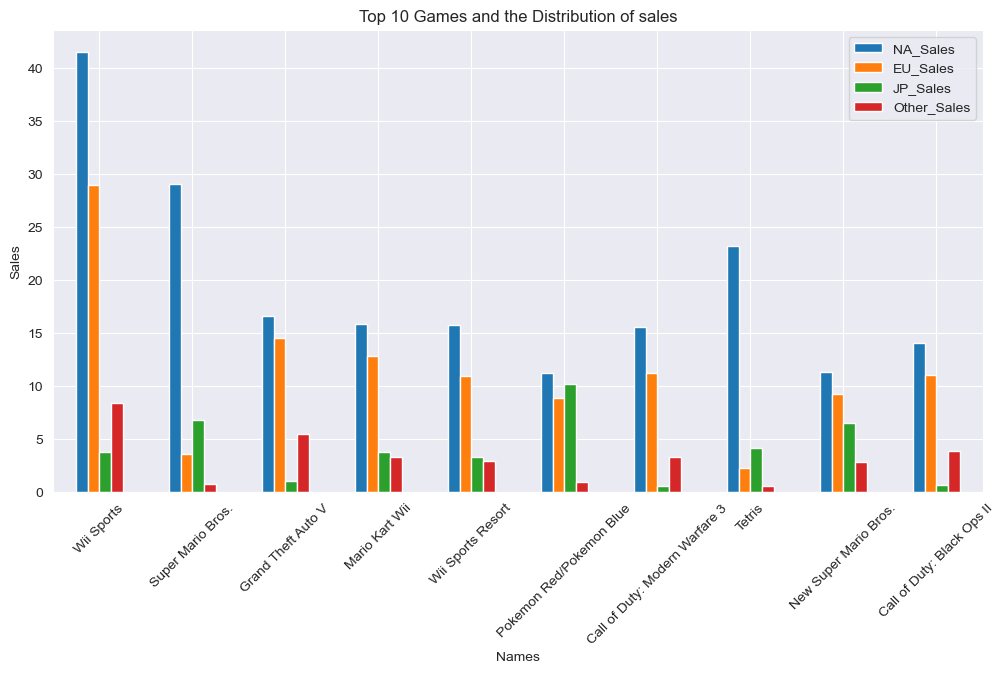

In [30]:
# 9. How does the distribution of sales across different regions (NA_Sales, EU_Sales, JP_Sales, Other_Sales) differ for the top 10 games by global sales?

region = df_grouped_sorted.head(10)
sales = region[['Name','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regions = sales.set_index('Name')

#Create figsize
plt.figure(figsize=(12,6))

#Stacked Bar Chart
regions.plot(kind='bar', figsize=(12,6))

plt.title('Top 10 Games and the Distribution of sales')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('Sales')

plt.show()

In [31]:
region

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11635,Wii Sports,Sports,2006.0,41.49,29.02,3.77,8.46,82.74
9849,Super Mario Bros.,Platform,1985.0,29.08,3.58,6.81,0.77,40.24
3935,Grand Theft Auto V,Action,2013.0,16.64,14.58,1.03,5.52,37.78
5856,Mario Kart Wii,Racing,2008.0,15.85,12.88,3.79,3.31,35.82
11637,Wii Sports Resort,Sports,2009.0,15.75,11.01,3.28,2.96,33.00
7735,Pokemon Red/Pokemon Blue,Role-Playing,1996.0,11.27,8.89,10.22,1.00,31.37
1308,Call of Duty: Modern Warfare 3,Shooter,2011.0,15.58,11.29,0.62,3.35,30.83
10267,Tetris,Puzzle,1989.0,23.20,2.26,4.22,0.58,30.26
7078,New Super Mario Bros.,Platform,2006.0,11.38,9.23,6.50,2.90,30.01
1304,Call of Duty: Black Ops II,Shooter,2012.0,14.08,11.05,0.72,3.88,29.72


In [32]:
# 10.What is the average rank of games released by each publisher, and which publisher has the highest average rank?

average_publisher = df.groupby('Publisher')['Rank'].mean().reset_index()
average_publisher = average_publisher.sort_values(by= 'Rank')
print(f"Average rank of games released by each publisher{average_publisher}")

Average rank of games released by each publisher               Publisher     Rank
385               Palcom    277.0
424              Red Orb    579.0
40   Arena Entertainment    697.0
522          UEP Systems    717.0
533                Valve   1018.0
..                   ...      ...
249         Inti Creates  16475.0
495               Takuyo  16506.0
244   Interchannel-Holon  16513.0
421           Rain Games  16568.0
524    UIG Entertainment  16573.0

[578 rows x 2 columns]


In [33]:
#Highest average rank 
highest_average_rank = df.loc[average_publisher['Rank'].idxmax()]
print(f"The publisher with the highest average rank is {highest_average_rank['Publisher']}")

The publisher with the highest average rank is THQ
